# Learning

In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
MODEL = 'ResNet50'
batch_size=8
train_data_path = './CargoContainerImages/train/'
num_classes = 2
max_epoches = 10

In [44]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode ='categorical')

Found 127 images belonging to 2 classes.


In [45]:
if MODEL == 'ResNet50':
    from tensorflow.keras.applications.resnet50 import ResNet50
    from tensorflow.keras.applications.resnet50 import preprocess_input
    model = ResNet50(weights = None, classes=num_classes)
    output_node_name = 'fc1000/Softmax'
if MODEL == 'VGG16':
    from tensorflow.keras.applications.vgg16 import VGG16
    from tensorflow.keras.applications.vgg16 import preprocess_input
    model = VGG16(weights = None, classes = num_classes)
    output_node_name = 'predictions/Softmax'


In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit_generator(train_generator, epochs = max_epoches)

Epoch 1/10
16/16 [==============================] - 27s 2s/step - loss: 3.0975 - accuracy: 0.5669
Epoch 2/10
16/16 [==============================] - 28s 2s/step - loss: 0.8671 - accuracy: 0.6850
Epoch 3/10
16/16 [==============================] - 28s 2s/step - loss: 0.2654 - accuracy: 0.9055
Epoch 4/10
16/16 [==============================] - 28s 2s/step - loss: 0.0746 - accuracy: 0.9685
Epoch 5/10
16/16 [==============================] - 27s 2s/step - loss: 0.1853 - accuracy: 0.9528
Epoch 6/10
16/16 [==============================] - 28s 2s/step - loss: 0.1071 - accuracy: 0.9528
Epoch 7/10
16/16 [==============================] - 28s 2s/step - loss: 0.0991 - accuracy: 0.9528
Epoch 8/10
16/16 [==============================] - 28s 2s/step - loss: 0.0406 - accuracy: 0.9921
Epoch 9/10
16/16 [==============================] - 28s 2s/step - loss: 0.0237 - accuracy: 0.9921
Epoch 10/10
16/16 [==============================] - 28s 2s/step - loss: 0.0120 - accuracy: 1.0000


In [47]:
model.save('./saved_model/' + MODEL + 'saved.h5')

In [48]:
MODEL = 'VGG16'
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit_generator(train_generator, epochs = max_epoches)
model.save('saved_model/' + MODEL + 'saved.h5')

Epoch 1/10
16/16 [==============================] - 27s 2s/step - loss: 0.8023 - accuracy: 0.8031
Epoch 2/10
16/16 [==============================] - 28s 2s/step - loss: 0.3648 - accuracy: 0.8425
Epoch 3/10
16/16 [==============================] - 28s 2s/step - loss: 0.2918 - accuracy: 0.9055
Epoch 4/10
16/16 [==============================] - 28s 2s/step - loss: 0.1504 - accuracy: 0.9370
Epoch 5/10
16/16 [==============================] - 28s 2s/step - loss: 0.0769 - accuracy: 0.9764
Epoch 6/10
16/16 [==============================] - 28s 2s/step - loss: 0.1429 - accuracy: 0.9606
Epoch 7/10
16/16 [==============================] - 28s 2s/step - loss: 0.2102 - accuracy: 0.9213
Epoch 8/10
16/16 [==============================] - 28s 2s/step - loss: 0.0964 - accuracy: 0.9606
Epoch 9/10
16/16 [==============================] - 28s 2s/step - loss: 0.0572 - accuracy: 0.9843
Epoch 10/10
16/16 [==============================] - 28s 2s/step - loss: 0.0498 - accuracy: 0.9685


# Prediction

In [54]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
#import uff

In [55]:
MODEL = 'VGG16'

In [56]:
if MODEL == 'ResNet50':
    output_node_name = 'fc1000/Softmax'
if MODEL == 'VGG16':
    output_node_name  = 'predictions/Softmax'
#sess = K.get_session()
#K.set_learning_phase(0)
#graph = tf.get_default_graph()
model = load_model('saved_model/' + MODEL + 'saved.h5')
model.compile(loss = 'categorical_crossenthropy', optimizer = 'adam', metrics= ['accuracy'])
#output_graph_def = tf.graph_util.convert_variables_to_constants(sess, graph.as_graph_def(), ['input_1', output_node_name])
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [57]:
#uffmodel = uff.from_tensorflow(output_graph_def, [output_node_name], 
#                              output_filename = 'saved_model/' + MODEL + 'uff')

In [60]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
if MODEL == 'ResNet50':
    from tensorflow.keras.applications.resnet50 import decode_predictions
if MODEL == 'VGG16':
    from tensorflow.keras.applications.vgg16 import decode_predictions

def predict_all(folder):
    HORIZONTAL = 0
    VERTICAL = 0
    for filename in os.listdir(folder):
        print(filename)
        fullpath = os.path.join(folder, filename)  # 폴더명과 파일명을 결합
        #print("fullpath", fullpath)  
        try:
            # 테스트할 이미지 불러오기
            img = load_img(fullpath, target_size=(224, 224)) 
            plt.imshow(img)
            plt.show()
            # ResNet에 입력하기 전에 이미지 전처리
            x = img_to_array(img) /255.0
            x = np.expand_dims(x, axis=0)
            #x = preprocess_input(x)

            # 이미지 분류
            preds = model.predict(x)
            print( preds)
            if preds[0][0] > preds[0][1]:
                print('HORIZONTAL')
                HORIZONTAL += 1
            else:
                print('VERTICAL')
                VERTICAL += 1
            #print('Predicted:', decode_predictions(preds, top=1)[0])
            print("")

        except Exception as e:
            print(e)
            print('')
    print('HORIZONTAL: {}%, VERTICAL {}%'.format(100*HORIZONTAL/(HORIZONTAL+VERTICAL), 100*VERTICAL/(HORIZONTAL+VERTICAL) ))

CKLU4111544.jpg


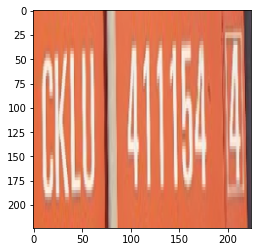

[[9.9997354e-01 2.6423857e-05]]
HORIZONTAL

BHCU2088072.jpg


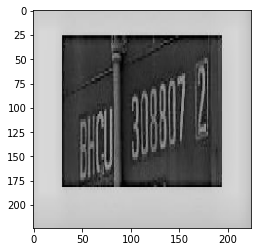

[[0.9731611  0.02683882]]
HORIZONTAL

MWLU2480338.jpg


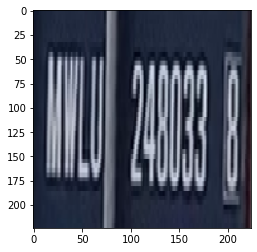

[[0.99774384 0.00225618]]
HORIZONTAL

ICSU4925022.jpg


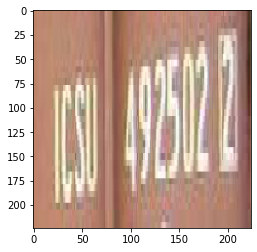

[[0.99651355 0.00348644]]
HORIZONTAL

TGHU3055299.jpg


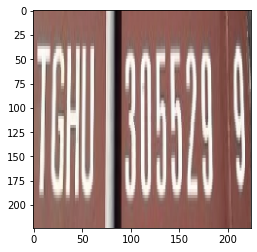

[[1.0000000e+00 2.9065845e-37]]
HORIZONTAL

CPWU700522.jpg


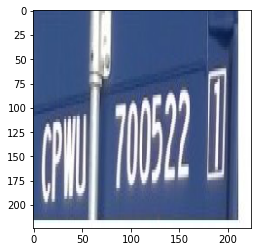

[[1.000000e+00 3.673774e-31]]
HORIZONTAL

GVTU2086449.JPG


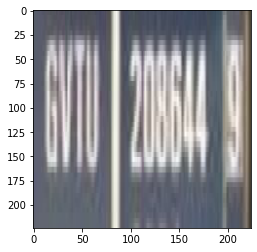

[[9.9997652e-01 2.3522854e-05]]
HORIZONTAL

CISU2000076.jpg


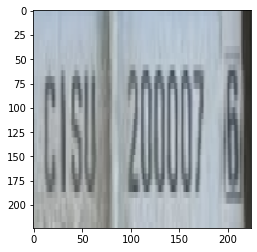

[[9.994411e-01 5.589222e-04]]
HORIZONTAL

FCIU3558552.jpg


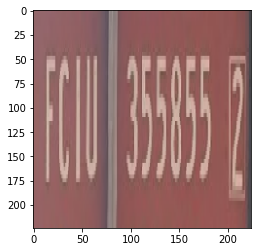

[[0.06635818 0.9336418 ]]
VERTICAL

TRLU5438620.JPG


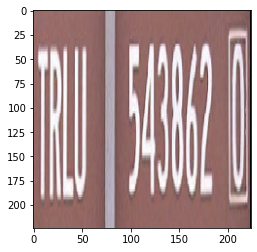

[[1. 0.]]
HORIZONTAL

HORIZONTAL: 90.0%, VERTICAL 10.0%


In [61]:
predict_all('./CargoContainerImages/test/1/')

MTBU2033374.jpg


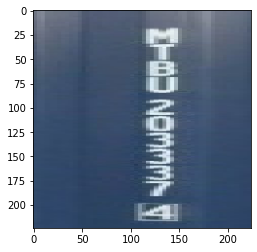

[[0.16398007 0.83601993]]
VERTICAL

CBXU2785862.jpg


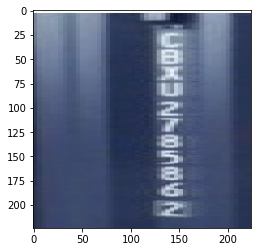

[[0.8553889  0.14461114]]
HORIZONTAL

VICU5000230.jpg


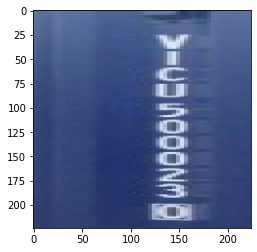

[[0.4240457 0.5759543]]
VERTICAL

FBXU0220812.jpg


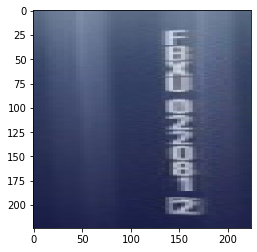

[[0.96408826 0.03591179]]
HORIZONTAL

FXLU8425651.jpg


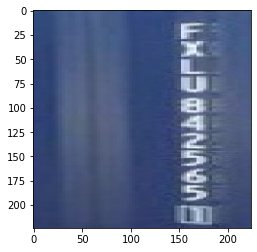

[[0.9543904 0.0456096]]
HORIZONTAL

TCNU6120328.jpg


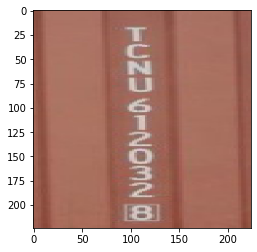

[[9.9987507e-01 1.2491013e-04]]
HORIZONTAL

SCTU0017000.jpg


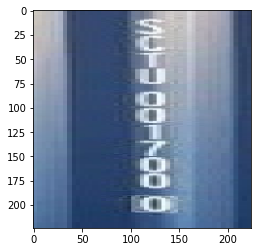

[[0.03262703 0.967373  ]]
VERTICAL

DLSU5001789.jpg


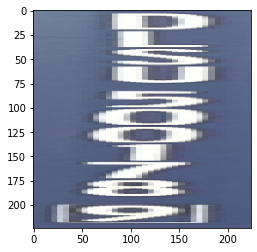

[[0.04280435 0.95719564]]
VERTICAL

CAIU8121016.jpg


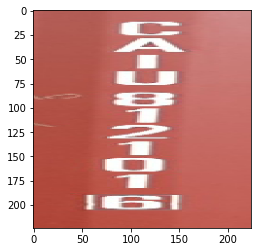

[[0.01721537 0.98278457]]
VERTICAL

HPCU4006609.jpg


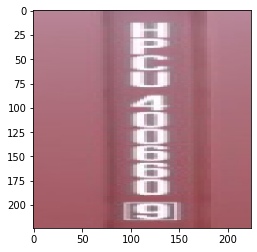

[[0.03555401 0.96444595]]
VERTICAL

HORIZONTAL: 40.0%, VERTICAL 60.0%


In [62]:
predict_all('./CargoContainerImages/test/2/')

In [17]:
a = 86
b=61
a/(a+b)

0.5850340136054422

# Extra

In [41]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
 
# imagenet에 미리 훈련된 ResNet50 모델 불러오기
model = ResNet50(weights='imagenet')

 
# 테스트할 이미지 불러오기
img_path = 'test.jpg'
img = load_img(img_path, target_size=(224, 224)) 
 
# ResNet에 입력하기 전에 이미지 전처리
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
# 이미지 분류
preds = model.predict(x)
#print(preds)
print('Predicted:', decode_predictions(preds, top=3)[0])


Predicted: [('n02690373', 'airliner', 0.83656716), ('n04266014', 'space_shuttle', 0.111536644), ('n04592741', 'wing', 0.048142947)]
